In [56]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from constants import BATCH_SIZE, CLASS_NAMES, TEST_PATH_PIECES

# hacky fix to get the correct working dir for notebooks
if not TEST_PATH_PIECES.startswith('/home'):
    TEST_PATH_PIECES = os.path.join(
        os.getcwd(),
        "data",
        "pieces_test"
        )

In [57]:
# Load the model

MODEL_FILEPATH = os.path.join(
    os.getcwd(),
    "model_checkpoints",
    "chess_pieces.keras"
    )

model = keras.models.load_model(MODEL_FILEPATH)

In [58]:
# Load piece test dataset

test_data = keras.utils.image_dataset_from_directory(
    TEST_PATH_PIECES,  # path to images
    labels='inferred',  # labels are generated from the directory structure
    label_mode='categorical',  # categorical cross-entropy
    class_names=CLASS_NAMES,  # control the order of the class names
    color_mode='rgb',  # alternatives: 'grayscale', 'rgba'
    batch_size=BATCH_SIZE,
    image_size=(50, 50),
    shuffle=False,  # shuffle images before each epoch
    seed=0,  # shuffle seed
    validation_split= None,  # percentage of validation data
    #subset='both',  # return a tuple of datasets (train, val)
    interpolation='bilinear',  # interpolation method used when resizing images
    follow_links=False,  # follow folder structure?
    crop_to_aspect_ratio=False
    )

# 1280000 images

Found 1280000 files belonging to 13 classes.


In [ ]:
# Generate Predictions

test_predictions = model.predict(test_data)  # 1H-encoded
print(test_predictions.shape)  # (1280000, 13)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 131s 65ms/step
(1280000, 13)


In [60]:
# Calculate accuracy

# convert 1H-encoded to cardinal encoded
y_pred = np.argmax(test_predictions, axis=1)
y_true = np.argmax(np.concatenate([y for _, y in test_data], axis=0), axis=1)

print(f'Test accuracy = {1 - np.sum(y_true != y_pred) / y_pred.size}') # 0.999995

Test accuracy = 0.9999953125


2025-10-29 15:17:35.661883: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


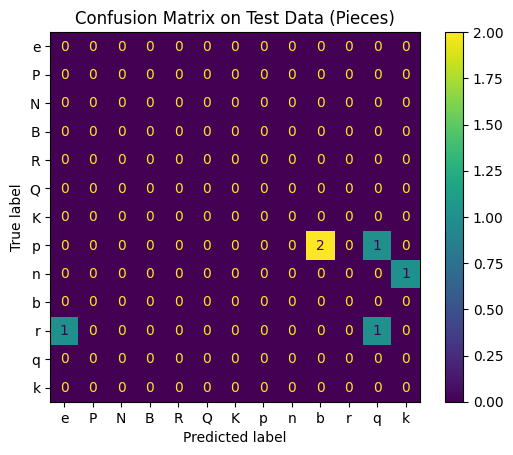

In [61]:
# Calculate and plot the confusion matrix

conf_mat = confusion_matrix(
    y_true,
    y_pred,
    )

# the numbers on the diagonals are O(10^3) or higher => set them to 0
np.fill_diagonal(conf_mat, 0)

disp = ConfusionMatrixDisplay(conf_mat, display_labels=CLASS_NAMES)

disp.plot()
plt.title("Confusion Matrix on Test Data (Pieces)")
plt.show()

In [62]:
# Get wrongly predicted pieces

confused_pieces = []
confused_indexes = np.where(y_true != y_pred)[0]

k=0
for batch_no, (x, y) in enumerate(test_data):
    if batch_no in set((confused_indexes // BATCH_SIZE)):
        idx = confused_indexes[k]
        img_array = x.numpy()[idx % BATCH_SIZE]
        predicted_label = CLASS_NAMES[y_pred[idx]]
        confused_pieces.append((img_array, predicted_label))
        k += 1

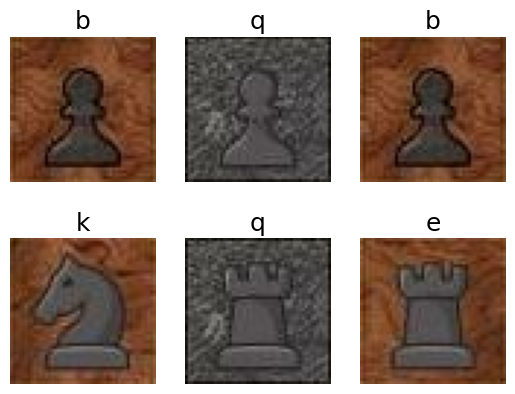

In [63]:
# Show wrongly predicted pieces

n_cols = 3

for i, (image, label) in enumerate(confused_pieces):
    plt.subplot(len(confused_indexes) // n_cols, n_cols, i+1)
    plt.imshow(image.astype(int))
    plt.title(label, fontsize=18)
    plt.axis('off')
plt.show()